In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Data loading
df = pd.read_csv('FactSales.csv')
df

,SalesKey,DateKey,Month,Year,channelKey,StoreKey,ProductKey,PromotionKey,UnitCost,UnitPrice,SalesQuantity,TotalCost,SalesAmount,Margin,MarginQty,Itemkey,Product,Main category
0,7077,13/04/2020,4,2020,1,297,1086,17,139.80,304,8,"1,118.40","2,432.00","1,313.60",164.2,1001,Floor lamp,Lighting
1,7078,14/06/2021,6,2021,1,203,904,1,38.74,75.99,20,774.8,"1,519.80",745,37.25,1002,Dining chair,Dining
2,7079,01/11/2021,11,2021,3,200,221,22,275.46,599,13,"3,580.98","7,787.00","4,206.02",323.54,1003,Rugs,Accessories
3,7080,11/12/2020,12,2020,1,162,1132,13,207.74,627,13,"2,700.62","8,151.00","5,450.38",419.26,1001,Floor lamp,Lighting
4,7081,16/04/2019,4,2019,1,265,693,6,75.87,229,18,"1,365.66","4,122.00","2,756.34",153.13,1004,Bedside tables,Bedroom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1565792,04/11/2019,11,2019,1,244,517,10,271.35,819,8,"2,170.80","6,552.00","4,381.20",547.65,1007,Vibrant,Art
1048571,1565793,23/11/2019,11,2019,1,99,512,4,65.77,129,6,394.62,774,379.38,63.23,1007,Vibrant,Art
1048572,1565794,23/08/2019,8,2019,1,29,1444,3,105.77,230,12,"1,269.24","2,760.00","1,490.76",124.23,1011,Arm chairs,Living
1048573,1565795,03/01/2019,1,2019,1,296,869,5,32.19,69.99,13,418.47,909.87,491.4,37.8,1020,Bar and counter,Dining


In [3]:
# Data cleaning and preprocessing
df.isnull().sum()

SalesKey         0
DateKey          0
Month            0
Year             0
channelKey       0
StoreKey         0
ProductKey       0
PromotionKey     0
UnitCost         0
UnitPrice        0
SalesQuantity    0
TotalCost        0
SalesAmount      0
Margin           0
MarginQty        0
Itemkey          0
Product          0
Main category    0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 18 columns):
SalesKey         1048575 non-null int64
DateKey          1048575 non-null object
Month            1048575 non-null int64
Year             1048575 non-null int64
channelKey       1048575 non-null int64
StoreKey         1048575 non-null int64
ProductKey       1048575 non-null int64
PromotionKey     1048575 non-null int64
UnitCost         1048575 non-null float64
UnitPrice        1048575 non-null object
SalesQuantity    1048575 non-null int64
TotalCost        1048575 non-null object
SalesAmount      1048575 non-null object
Margin           1048575 non-null object
MarginQty        1048575 non-null object
Itemkey          1048575 non-null int64
Product          1048575 non-null object
Main category    1048575 non-null object
dtypes: float64(1), int64(9), object(8)
memory usage: 144.0+ MB


In [5]:
# List of columns that need cleaning by removing the thousand separator which results in treating the column as object[text]
cols_to_clean = ['UnitPrice', 'TotalCost', 'SalesAmount', 'Margin', 'MarginQty']
for col in cols_to_clean:
    # Remove the comma
    df[col] = df[col].astype(str).str.replace(',', '', regex=False)

    # Convert to numeric
    df[col] = pd.to_numeric(df[col], errors='coerce')
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 18 columns):
SalesKey         1048575 non-null int64
DateKey          1048575 non-null object
Month            1048575 non-null int64
Year             1048575 non-null int64
channelKey       1048575 non-null int64
StoreKey         1048575 non-null int64
ProductKey       1048575 non-null int64
PromotionKey     1048575 non-null int64
UnitCost         1048575 non-null float64
UnitPrice        1048575 non-null float64
SalesQuantity    1048575 non-null int64
TotalCost        1048575 non-null float64
SalesAmount      1048575 non-null float64
Margin           1048575 non-null float64
MarginQty        1048575 non-null float64
Itemkey          1048575 non-null int64
Product          1048575 non-null object
Main category    1048575 non-null object
dtypes: float64(6), int64(9), object(3)
memory usage: 144.0+ MB


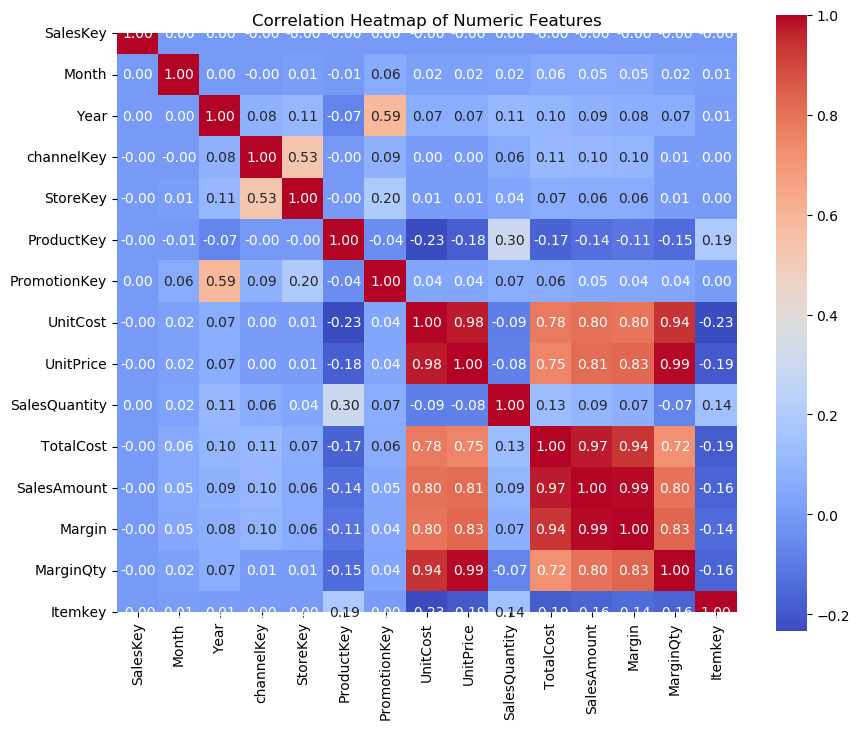

In [6]:
# Exploratory Data Analysis

# Let's start by visualizing the distribution of some key numeric features.
numeric_df = df.select_dtypes(include=[np.number])

# If there are four or more numeric columns, we produce a correlation heatmap
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(10,8))
    correlation_matrix = numeric_df.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
    plt.title('Correlation Heatmap of Numeric Features')
    plt.show()

In [ ]:
# Pair Plot for numeric features
#dfplot = df[['ProductKey','UnitCost','UnitPrice','SalesQuantity','Margin']]
#sns.pairplot(dfplot)
#plt.suptitle('Pair Plot of Numeric Variables', y=1.02)
#plt.show()

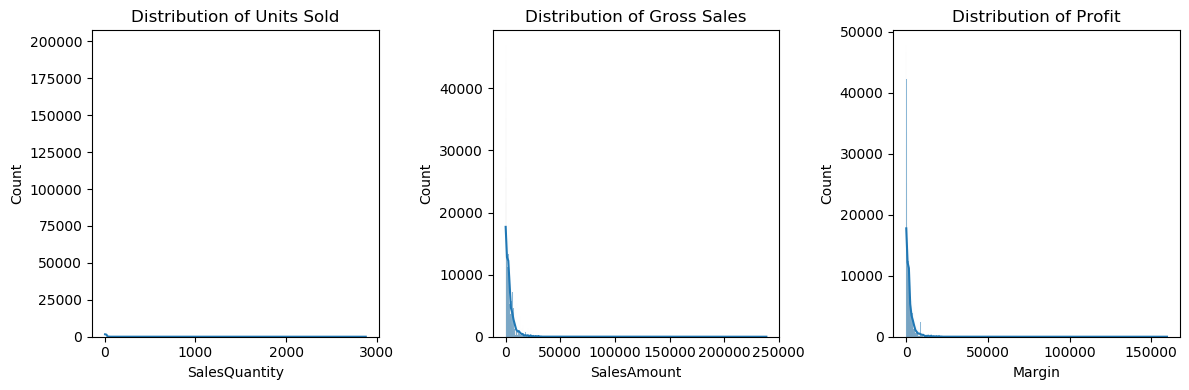

In [7]:
# Histogram for key metrics: Units Sold, Gross Sales, and Profit
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.histplot(df['SalesQuantity'], kde=True)
plt.title('Distribution of Units Sold')

plt.subplot(1,3,2)
sns.histplot(df['SalesAmount'], kde=True)
plt.title('Distribution of Gross Sales')

plt.subplot(1,3,3)
sns.histplot(df['Margin'], kde=True)
plt.title('Distribution of Profit')

plt.tight_layout()
plt.show()

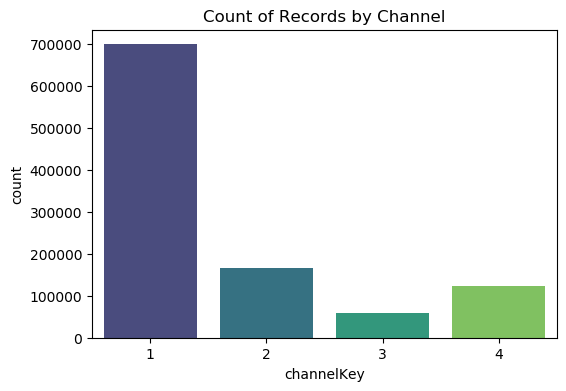

In [8]:
# Count Plot (Pie Chart alternative) for the 'Segment' categorical variable
plt.figure(figsize=(6,4))
sns.countplot(x='channelKey', data=df, palette='viridis')
plt.title('Count of Records by Channel')
plt.show()

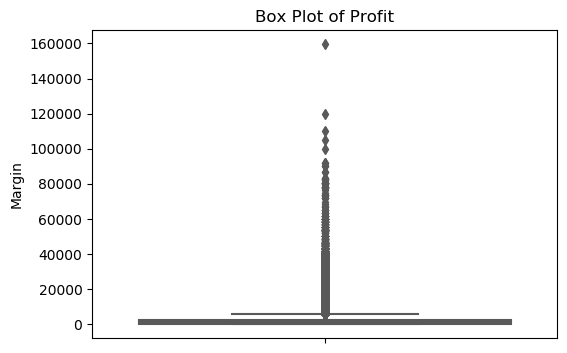

In [9]:
# Box Plot to detect outliers in Profit
plt.figure(figsize=(6,4))
sns.boxplot(y='Margin', data=df, palette='Set2')
plt.title('Box Plot of Profit')
plt.show()

In [10]:
predictor_rel = ['SalesQuantity', 'UnitCost', 'UnitPrice', 'SalesAmount', 'TotalCost','Margin']
df[predictor_rel].corr()

,SalesQuantity,UnitCost,UnitPrice,SalesAmount,TotalCost,Margin
SalesQuantity,1.000000,-0.088089,-0.079592,0.094801,0.126674,0.072792
UnitCost,-0.088089,1.000000,0.975799,0.803925,0.783158,0.796671
UnitPrice,-0.079592,0.975799,1.000000,0.812253,0.750728,0.829911
SalesAmount,0.094801,0.803925,0.812253,1.000000,0.974885,0.990535
TotalCost,0.126674,0.783158,0.750728,0.974885,1.000000,0.935088
Margin,0.072792,0.796671,0.829911,0.990535,0.935088,1.000000


In [11]:
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print("\nData Types:\n", df.dtypes)
df.describe(include='all')

Shape: (1048575, 18)
Columns: ['SalesKey', 'DateKey', 'Month', 'Year', 'channelKey', 'StoreKey', 'ProductKey', 'PromotionKey', 'UnitCost', 'UnitPrice', 'SalesQuantity', 'TotalCost', 'SalesAmount', 'Margin', 'MarginQty', 'Itemkey', 'Product', 'Main category']

Data Types:
 SalesKey           int64
DateKey           object
Month              int64
Year               int64
channelKey         int64
StoreKey           int64
ProductKey         int64
PromotionKey       int64
UnitCost         float64
UnitPrice        float64
SalesQuantity      int64
TotalCost        float64
SalesAmount      float64
Margin           float64
MarginQty        float64
Itemkey            int64
Product           object
Main category     object
dtype: object


,SalesKey,DateKey,Month,Year,channelKey,StoreKey,ProductKey,PromotionKey,UnitCost,UnitPrice,SalesQuantity,TotalCost,SalesAmount,Margin,MarginQty,Itemkey,Product,Main category
count,1.048575e+06,1048575,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1048575,1048575
unique,NaN,1096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,7
top,NaN,26/10/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Table lamps,Lighting
freq,NaN,1494,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105231,259321
mean,7.827654e+05,NaN,6.592530e+00,2.019836e+03,1.626341e+00,1.963188e+02,8.813583e+02,8.500063e+00,1.244762e+02,2.968902e+02,1.601846e+01,1.554133e+03,3.662072e+03,2.107939e+03,1.720519e+02,1.009546e+03,NaN,NaN
std,4.520318e+05,NaN,3.415338e+00,8.170012e-01,1.028064e+00,9.554673e+01,5.092229e+02,8.261262e+00,1.265451e+02,3.466745e+02,3.963597e+01,1.883265e+03,4.862670e+03,3.055625e+03,2.247024e+02,5.381548e+00,NaN,NaN
min,1.000000e+00,NaN,1.000000e+00,2.019000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.800000e-01,9.500000e-01,3.000000e+00,1.920000e+00,2.850000e+00,9.300000e-01,3.100000e-01,1.001000e+03,NaN,NaN
25%,3.913595e+05,NaN,4.000000e+00,2.019000e+03,1.000000e+00,1.210000e+02,4.530000e+02,1.000000e+00,3.058000e+01,5.999000e+01,9.000000e+00,3.194400e+02,6.540000e+02,3.343000e+02,3.235000e+01,1.005000e+03,NaN,NaN
50%,7.826100e+05,NaN,7.000000e+00,2.020000e+03,1.000000e+00,2.000000e+02,8.800000e+02,4.000000e+00,8.737000e+01,2.000000e+02,1.000000e+01,9.860400e+02,2.300000e+03,1.270500e+03,1.080000e+02,1.009000e+03,NaN,NaN
75%,1.174146e+06,NaN,1.000000e+01,2.021000e+03,2.000000e+00,2.960000e+02,1.273000e+03,1.400000e+01,1.626400e+02,3.580000e+02,1.300000e+01,2.064450e+03,4.699700e+03,2.550400e+03,1.939100e+02,1.013000e+03,NaN,NaN


In [12]:
# Example cleaning step (convert to numeric, coercing errors to NaN)
df['SalesAmount'] = pd.to_numeric(df['SalesAmount'], errors='coerce')
# Then drop or fill NaNs if necessary before re-running the filtering
df.dropna(subset=['SalesAmount'], inplace=True)

In [13]:
print(df['SalesQuantity'].value_counts(dropna=False))
print(df['SalesQuantity'].unique())

10     197576
9      158939
12     154910
13      84134
8       62861
        ...  
68          1
56          1
55          1
42          1
500         1
Name: SalesQuantity, Length: 186, dtype: int64
[   8   20   13   18   10    6   24   39    5   12   96   11    9   30
   19  100   32    3   52    4   14    7   25   80   36   34   26   38
   23   27   16   40  200   15 1040   35   47   17   48  120  959  160
  240  479   51   29   99   22  400   72  480  260   60 1080   31  180
  159   46  719  320   77  360  259   21   54  238  239  720  520   58
  519  119   78  359   79   64 1560  399  199  800   50   44   53 1440
   49   37   45  179   59  102   71   33  599 1199  158  155   28  233
  319   90  398   65   63  103   98   55   76  108  144  639  960  198
  156   81  600  598   70   95  104  358  478  300 1039   43  130  539
  116   69  299  798 1599  640  118   89  799  718   57   62 1439 1079
   94 1559 1200   88 1920  318  780  107  958  540  106   41  129  117
  779   56   83   

In [14]:
# T-Test
from scipy.stats import ttest_ind, chi2_contingency
import warnings

# Convert 'SalesAmount' to numeric, coercing any non-numeric strings to NaN.
# A new column is created to preserve the original if needed.
df['SalesAmount_Cleaned'] = pd.to_numeric(df['SalesAmount'], errors='coerce')

# Drop rows where the cleaned SalesAmount is NaN to ensure only valid numbers are used.
# If you prefer to fill NaNs (e.g., with the mean), change this step.
df_cleaned = df.dropna(subset=['SalesAmount_Cleaned'])

# Define the threshold for what constitutes a "Large" and "Small" deal quantity
LARGE_THRESHOLD = 10 
SMALL_THRESHOLD = 5 

large_sales = df_cleaned[df_cleaned['SalesQuantity']>= LARGE_THRESHOLD]['SalesAmount_Cleaned']
small_sales = df_cleaned[df_cleaned['SalesQuantity']<= SMALL_THRESHOLD]['SalesAmount_Cleaned']

print(f"Large Sales Count: {len(large_sales)}")
print(f"Small Sales Count: {len(small_sales)}")

t_stat, p_value = ttest_ind(large_sales, small_sales, equal_var=False)
print(f"T-test SalesAmount (Large vs Small deals): t={t_stat:.2f}, p={p_value:.4f}")
if p_value < 0.05:
    print("Reject null: Large deals have significantly higher average sales.")
else:
    print("Fail to reject null: No significant difference.")

Large Sales Count: 667940
Small Sales Count: 97220
T-test SalesAmount (Large vs Small deals): t=556.17, p=0.0000
Reject null: Large deals have significantly higher average sales.


In [15]:
#ANOVA
from scipy.stats import f_oneway

groups = [df[df['Main category']==pl]['SalesAmount'] for pl in df['Main category'].unique()]
f_stat, p_val = f_oneway(*groups)
print(f"ANOVA SalesAmount by Main category: F={f_stat:.2f}, p={p_val:.4f}")
if p_val < 0.05:
    print("Sales differ significantly between product lines.")
else:
    print("No significant difference among product lines.")

ANOVA SalesAmount by Main category: F=18530.44, p=0.0000
Sales differ significantly between product lines.


In [17]:
# CHI2
from scipy.stats import ttest_ind, chi2_contingency
contingency = pd.crosstab(df['Margin'], df['SalesQuantity'])
chi2, p, dof, exp = chi2_contingency(contingency)
print(f"Chi-squared test ('Margin' vs 'SalesQuantity'): chi2={chi2:.2f}, p={p:.4f}")
if p < 0.05:
    print("Reject null: 'Main category' and 'SalesQuantity' are not independent.")
else:
    print("Fail to reject null: Independent.")

Chi-squared test ('Margin' vs 'SalesQuantity'): chi2=177457884.28, p=0.0000
Reject null: 'Main category' and 'SalesQuantity' are not independent.


In [18]:
# Prediction and Model Building
# In this section, we build a predictor to forecast 'Profit' based on a selection of numeric features.

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Selecting potential predictor variables
predictor_vars = ['SalesQuantity', 'UnitCost', 'UnitPrice', 'SalesAmount', 'TotalCost']

# Ensuring all required predictor columns are present
for col in predictor_vars:
    if col not in df.columns:
        raise ValueError(f"The required column '{col}' is missing from the dataset.")

X = df[predictor_vars]
y = df['Margin']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model using the R^2 score
r2 = r2_score(y_test, y_pred)
print(f"The R^2 score of the linear regression model is: {r2:.3f}")


The R^2 score of the linear regression model is: 1.000


In [19]:
from sklearn.tree import DecisionTreeRegressor
modelDT = DecisionTreeRegressor()
modelDT.fit(X_train, y_train)
# Predict on the test set
y_pred = modelDT.predict(X_test)

# Evaluate the model using the R^2 score
r2 = r2_score(y_test, y_pred)
print(f"The R^2 score of the linear regression model is: {r2:.3f}")

The R^2 score of the linear regression model is: 1.000
